Multiple Comparison of Means - Tukey HSD, FWER=0.02
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     0.08 0.9975 -1.1873 1.3473  False
     A      C    0.046 0.9995 -1.2213 1.3133  False
     A      D    1.989 0.0002  0.7217 3.2563   True
     B      C   -0.034 0.9998 -1.3013 1.2333  False
     B      D    1.909 0.0003  0.6417 3.1763   True
     C      D    1.943 0.0003  0.6757 3.2103   True
---------------------------------------------------


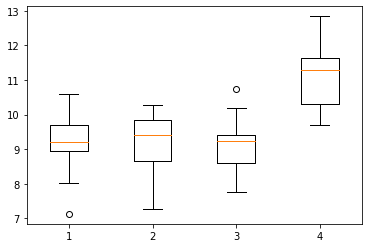

In [10]:
#Anova hypothesis test
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

import statsmodels.stats.anova as sma
import statsmodels.stats.multicomp as smm

import matplotlib.pyplot as plt

fr1 = pd. read_csv("Fructose.csv")
plt.figure()
plt.boxplot( (fr1.Fructose[fr1.Variety=="A"],
             fr1.Fructose[fr1.Variety=="B"],
             fr1.Fructose[fr1.Variety=="C"],
             fr1.Fructose[fr1.Variety=="D"]))

# muA is mean fructose of popA
# muB is mean fructose of popB
# muC is mean fructose of popC
# muD is mean fructose of popD
#H0: muA=muB=muC=muD
#HA: any 2 means are different. 
#significance level: aplha = .023
#test statistic: anova_lm
#decision rule: if pvalue < significance level reject H0. 
#

formula1="Fructose ~ C(Variety)"
fr1_lm = smf.ols(formula1, data=fr1).fit()
sma.anova_lm(fr1_lm)

#Decision, pvalue .000034 < .023 so we reject H0. 
#we have sufficient evidence the amount oof fructose differ by variety.
#since we rejected H0, we know there are statistically significant differences so now we
#do a tukey HSD to find differences
#tukey's hsd, honest significant difference test
#
#

tukey1 = smm.pairwise_tukeyhsd(endog=fr1.Fructose, groups=fr1.Variety, alpha=0.023)
print(tukey1)


In [ ]:
#VAriety D has the most fructose. MOre than A,B,C are all true. 

<Figure size 432x288 with 0 Axes>

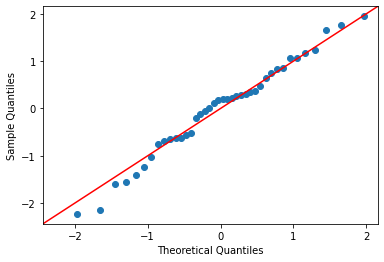

ShapiroResult(statistic=0.9789234399795532, pvalue=0.6496037840843201)

In [14]:
#check residual normal 
import statsmodels.api as stm
import scipy.stats as st
plt.figure()
stm.qqplot(fr1_lm.resid,fit=True,line="45")
plt.show()
#Null Hypothesis: H0 residuals normally dist
#HA: not normally distributed
#significance level: .0001
#decision rule if alpha < p-value reject
#test stat: shapiro test. 
#pvalue.64 > .001 Decision. so fail to reject H0 and not normally distributed
#conclusion we have insufficient evidence to claim the residuals are NOT normally distributed. 
st.shapiro(fr1_lm.resid)

In [16]:
#BETWEEN GROUPS FOR DATA NOT RESIDUALS.
st.levene(fr1.Fructose[fr1.Variety=="A"],
          fr1.Fructose[fr1.Variety=="B"],
          fr1.Fructose[fr1.Variety=="C"],
          fr1.Fructose[fr1.Variety=="D"]
         )


#hypothesis testing constant variance across residuals 
#H0: constant variance across varieies
#HA: not constant variance across varieties
#Significance levels: .0001
#test statistic: scipy.stats.levene
#decision rule: if pvalue < significance we reject H0
# pvalue: 
#
st.levene(fr1_lm.resid[fr1.Variety=="A"],
          fr1_lm.resid[fr1.Variety=="B"],
          fr1_lm.resid[fr1.Variety=="C"],
          fr1_lm.resid[fr1.Variety=="D"]
         )
#pvalue=.96 and is >pvalue .0001 we fail to reject H0.
#conclusion: insufficient evidence to claim the variacne are not constant aross
#the residuals. 
#one way anova


LeveneResult(statistic=0.09413229678020081, pvalue=0.96279585129662)

In [ ]:
#add 2 way anova 
#